
**Background:**
In this project Our goal is to establish a robust intelligent system to aid our value investing efforts using stock market data. We make investment decisions and based on intrinsic value of companies and do not trade on the basis of daily market volatility. Our profit realization strategy typically involves weekly, monthly and quarterly performance of stocks we buy or hold.



**Data exploration:**

In [1]:
import pandas as pd

# Read the Excel file
excel_file = pd.ExcelFile('/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx')

# Get the sheet names
sheet_names = excel_file.sheet_names

# Iterate over each sheet
for sheet_name in sheet_names:
    # Read the sheet into a DataFrame
    df = excel_file.parse(sheet_name)
    
    # Print the sheet name
    print(f"Sheet Name: {sheet_name}")
    
    # Print the head of the sheet
    print(df.head())
    print()  # Empty line for separation

Sheet Name: Russia - Sberbank Rossii PAO (S
                  Date   Price    Open    High     Low    Vol.  Change %
0  2021-03-31 00:00:00  291.02     294  294.42  290.26  47.00M   -0.0076
1  2021-03-30 00:00:00  293.25  294.86  295.72   291.5  38.81M   -0.0002
2  2021-03-29 00:00:00   293.3  289.72  294.09  289.26  43.68M    0.0071
3  2021-03-26 00:00:00  291.22  288.63  292.75  288.32  56.07M    0.0159
4  2021-03-25 00:00:00  286.66   286.5  287.03  283.85  35.22M    0.0030

Sheet Name: Turkey - Koc Holding AS (KCHOL)
                  Date  Price   Open   High    Low    Vol.  Change %
0  2021-03-31 00:00:00  19.41  19.42  19.63  19.27  13.14M   -0.0046
1  2021-03-30 00:00:00   19.5  19.12  19.81  19.03  21.05M    0.0209
2  2021-03-29 00:00:00   19.1  19.24  19.67   19.1  16.56M   -0.0078
3  2021-03-26 00:00:00  19.25  20.28  20.36   19.1  21.35M   -0.0385
4  2021-03-25 00:00:00  20.02   20.5  20.86  20.02  15.93M   -0.0148

Sheet Name: Egypt - Medinet Nasr Housing (M
              

**Data Preparation:**

In [2]:
# Load the Excel file
file_path = '/kaggle/input/stockprice/2020Q1Q2Q3Q4-2021Q1.xlsx'
Russia = pd.read_excel(file_path, sheet_name='Russia - Sberbank Rossii PAO (S')  

# Convert date column to datetime format
Russia['Date'] = pd.to_datetime(Russia['Date'], infer_datetime_format=True, errors='coerce')


# Sort the data chronologically based on date
Russia = Russia.sort_values('Date')


# Print the updated DataFrame
print(Russia.head())
print(Russia.info())

          Date   Price    Open    High     Low    Vol.  Change %
310 2020-01-03     255  255.99  258.19   253.7  35.85M    0.0010
309 2020-01-06   253.9  254.75  254.84   251.4  22.35M   -0.0043
308 2020-01-08  259.15  253.57  259.15  253.03  40.82M    0.0207
307 2020-01-09  257.99   259.4  261.76  257.01  38.33M   -0.0045
306 2020-01-10  258.19  257.86  259.25  256.88  18.85M    0.0008
<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 310 to 311
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      311 non-null    datetime64[ns]
 1   Price     312 non-null    object        
 2   Open      312 non-null    object        
 3   High      312 non-null    object        
 4   Low       312 non-null    object        
 5   Vol.      311 non-null    object        
 6   Change %  311 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.5+ KB
None


In [3]:
# Convert Vol. column to float 
Russia['Vol.'] = Russia['Vol.'].str.replace('[^\d.]', '', regex=True).astype(float) * 1_000_000
Russia.rename(columns={'Vol.': 'Volume'}, inplace=True)

#wee need to drop the last column because it has diffrent data
print(Russia.tail(5),'\n')

# Drop row 311
Russia = Russia.drop(index=311)


# Convert Price, Open, High, Low columns to float 
for col in ['Price', 'Open', 'High', 'Low']:
    Russia[col] = Russia[col].astype(float)
   
Russia.rename(columns={'Price': 'Close'}, inplace=True)

# Print the updated DataFrame
print(Russia.head(),'\n')
print(Russia.info(),'\n')

          Date           Price                Open             High  \
3   2021-03-26          291.22              288.63           292.75   
2   2021-03-29           293.3              289.72           294.09   
1   2021-03-30          293.25              294.86           295.72   
0   2021-03-31          291.02                 294           294.42   
311        NaT  Lowest: 172.15  Difference: 123.92  Average: 234.52   

                 Low      Volume  Change %  
3             288.32  56070000.0    0.0159  
2             289.26  43680000.0    0.0071  
1              291.5  38810000.0   -0.0002  
0             290.26  47000000.0   -0.0076  
311  Change %: 14.24         NaN       NaN   

          Date   Close    Open    High     Low      Volume  Change %
310 2020-01-03  255.00  255.99  258.19  253.70  35850000.0    0.0010
309 2020-01-06  253.90  254.75  254.84  251.40  22350000.0   -0.0043
308 2020-01-08  259.15  253.57  259.15  253.03  40820000.0    0.0207
307 2020-01-09  257.99  2

**Data Exploration and Visualization:**

In [4]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


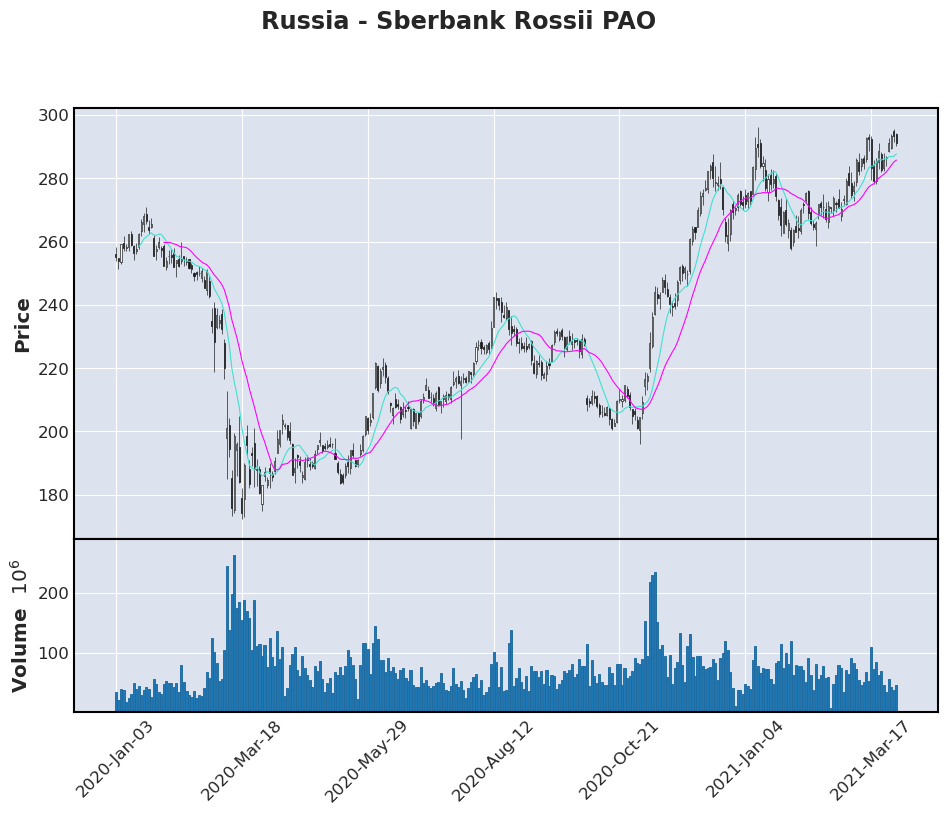

In [5]:
import mplfinance as mpf
import pandas as pd

if not isinstance(Russia.index, pd.core.indexes.datetimes.DatetimeIndex):
    Russia.set_index("Date", inplace=True)

mpf.plot(Russia, type='candle', volume=True, mav=(10, 20), figscale=1.5, title='Russia - Sberbank Rossii PAO')

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume 'Close' is the column containing the closing prices
# Assume the column name is 'Date' in the correct case

# Filter data for 2020 Q1, Q2, Q3, Q4
start_date = '2020-01-01'
end_date = '2020-12-31'
filtered_data = Russia.loc[(Russia.index >= start_date) & (Russia.index <= end_date)].copy()

# Compute moving averages
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    filtered_data.loc[:, col_name] = filtered_data['Close'].rolling(window=window_size).mean()

# Drop rows with NaN values
filtered_data.dropna(inplace=True)

# Define the features and target
features = filtered_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
target = filtered_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean Squared Error: 34.240777637941044


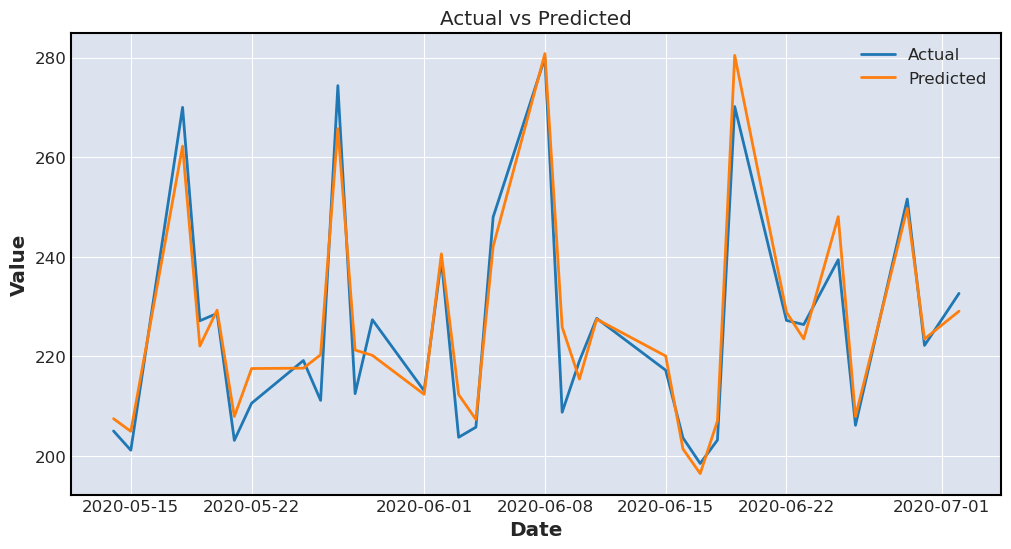

Mean Squared Error: 34.240777637941044


In [7]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(filtered_data.index[:len(y_test)], y_test, label='Actual')

# Plotting predicted values
plt.plot(filtered_data.index[:len(y_pred)], y_pred, label='Predicted')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {mse}")

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filter data for Q1 2021
start_date = '2021-01-01'
end_date = '2021-03-31'
q1_data = Russia.loc[(Russia.index >= start_date) & (Russia.index <= end_date)].copy()

# Compute moving averages for Q1 2021
window_sizes = [7, 30, 90]
for window_size in window_sizes:
    col_name = f'{window_size}-day Moving Average'
    q1_data[col_name] = q1_data['Close'].rolling(window=window_size).mean()

# Fill NaN values in 30-day and 90-day moving averages with values from 7-day moving average
q1_data['30-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)
q1_data['90-day Moving Average'].fillna(q1_data['7-day Moving Average'], inplace=True)

# Drop rows with NaN values
q1_data.dropna(inplace=True)

# Check if there are samples for Q1 2021 after dropping NaN values
if q1_data.shape[0] < 1:
    print("No data available for Q1 2021.")
else:
    # Define the features and target for Q1 2021
    q1_features = q1_data[['7-day Moving Average', '30-day Moving Average', '90-day Moving Average']]
    q1_target = q1_data['Close']

    # Make predictions for Q1 2021
    q1_predictions = regressor.predict(q1_features)  # Assuming 'regressor' is your trained model

    # Evaluate the model using Mean Squared Error (MSE) for Q1 2021
    q1_mse = mean_squared_error(q1_target, q1_predictions)
    print(f"Mean Squared Error (Q1 2021): {q1_mse}")

Mean Squared Error (Q1 2021): 22.631346866664874


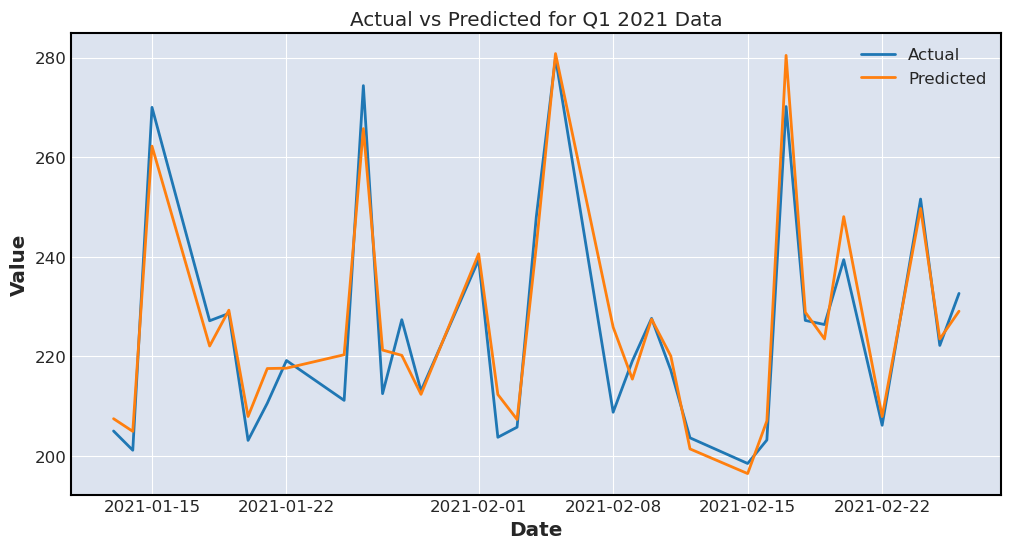

Mean Squared Error: 22.631346866664874


In [9]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(12, 6))

# Plotting actual values
plt.plot(q1_data.index[:len(y_test)], y_test, label='Actual')

# Plotting predicted values
plt.plot(q1_data.index[:len(y_pred)], y_pred, label='Predicted')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted for Q1 2021 Data')

# Add legend
plt.legend()

# Display the plot
plt.show()
print(f"Mean Squared Error: {q1_mse}")